In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import zipfile

In [3]:
zf = zipfile.ZipFile('/data/buildings.zip')
buildings = pd.read_csv(zf.open('Geb100m.csv'), delimiter=',', encoding="cp1252")


In [4]:
buildings

,Gitter_ID_100m,Gitter_ID_100m_neu,Merkmal,Auspraegung_Code,Auspraegung_Text,Anzahl,Anzahl_q
0,100mN26865E43357,CRS3035RES100mN2686500E4335700,INSGESAMT,0,Einheiten insgesamt,3,0
1,100mN26865E43357,CRS3035RES100mN2686500E4335700,HEIZTYP,4,Zentralheizung,3,0
2,100mN26865E43357,CRS3035RES100mN2686500E4335700,ZAHLWOHNGN_HHG,1,1 Wohnung,3,0
3,100mN26917E43411,CRS3035RES100mN2691700E4341100,INSGESAMT,0,Einheiten insgesamt,3,0
4,100mN26917E43411,CRS3035RES100mN2691700E4341100,EIGENTUM,1,Gemeinschaft von Wohnungseigentümern/-innen,3,0
...,...,...,...,...,...,...,...
24379870,100mN35476E42201,CRS3035RES100mN3547600E4220100,EIGENTUM,2,Privatperson/-en,3,0
24379871,100mN35476E42201,CRS3035RES100mN3547600E4220100,GEBAEUDEART_SYS,111,Wohngebäude (ohne Wohnheime),5,0
24379872,100mN35476E42201,CRS3035RES100mN3547600E4220100,GEBTYPBAUWEISE,3,Gereihtes Haus,3,0
24379873,100mN35476E42201,CRS3035RES100mN3547600E4220100,GEBTYPGROESSE,3,Einfamilienhaus: Reihenhaus,3,0


In [31]:
#read excel
translations = pd.read_excel('Data_Format_Census.xlsx', sheet_name='Translations')


In [32]:
translations

,Original,Translated
0,Merkmal,NaN
1,Auspraegung_Text,NaN
2,INSGESAMT,TOTAL
3,Einheiten insgesamt,Total
4,FAMTYP_KIND,FAMTYPE_CHILDREN
...,...,...
206,1 Wohnung,1 apartment
207,2 Wohnungen,2 apartments
208,3 - 6 Wohnungen,3 - 6 apartments
209,7 - 12 Wohnungen,7 - 12 apartments


In [33]:
#tansfrom to dictionary with original as key and translation as value
translation_dict = translations.set_index('Original')['Translated'].to_dict()
#translations_dict = dict(zip(translations['Original'], translations['Translated']))

In [35]:
pivot_df = buildings.pivot(index='Gitter_ID_100m',columns=['Merkmal', 'Auspraegung_Text'], values='Anzahl')

instead of replacing nan with 0, exclude these cells

In [37]:
#rename columns with trtanslation_dict
pivot_df = pivot_df.rename(columns=translation_dict)

In [38]:
pivot_df    

Merkmal          TOTAL       HEAT_TYPE APARTMENT_NO         OWNERSHIP_TYPE2  \
Auspraegung_Text Total Central heating  1 apartment Community of homeowners   
Gitter_ID_100m                                                                
100mN26865E43357   3.0             3.0          3.0                     NaN   
100mN26917E43411   3.0             3.0          NaN                     3.0   
100mN26923E43411   3.0             3.0          NaN                     NaN   
100mN26927E43440   3.0             NaN          3.0                     NaN   
100mN26931E43409   3.0             3.0          NaN                     NaN   
...                ...             ...          ...                     ...   
100mN35475E42201  12.0             7.0          8.0                     3.0   
100mN35476E42198   3.0             3.0          NaN                     NaN   
100mN35476E42199   8.0             7.0          NaN                     3.0   
100mN35476E42200   4.0             3.0          3.0                     NaN   
100mN35476E42201   5.0             NaN          4.0                     NaN   

Merkmal                                      BUILDING_TYPE1  OWNERSHIP_TYPE2  \
Auspraegung_Text Residential building (without Dormitories) Private person/s   
Gitter_ID_100m                                                                 
100mN26865E43357                                        NaN              NaN   
100mN26917E43411                                        3.0              NaN   
100mN26923E43411                                        NaN              3.0   
100mN26927E43440                                        NaN              3.0   
100mN26931E43409                                        NaN              NaN   
...                                                     ...              ...   
100mN35475E42201                                       11.0             10.0   
100mN35476E42198                                        3.0              NaN   
100mN35476E42199                                        8.0              5.0   
100mN35476E42200                                        4.0              3.0   
100mN35476E42201                                        5.0              3.0   

Merkmal          BUILDING_TYPE2                      BUILDING_SIZE  \
Auspraegung_Text Detached house Multi-family house: 3-6 apartments   
Gitter_ID_100m                                                       
100mN26865E43357            NaN                                NaN   
100mN26917E43411            NaN                                NaN   
100mN26923E43411            NaN                                NaN   
100mN26927E43440            NaN                                NaN   
100mN26931E43409            NaN                                NaN   
...                         ...                                ...   
100mN35475E42201            5.0                                3.0   
100mN35476E42198            NaN                                NaN   
100mN35476E42199            6.0                                4.0   
100mN35476E42200            3.0                                NaN   
100mN35476E42201            NaN                                NaN   

Merkmal              APARTMENT_NO BUILDING_YEAR  ...              \
Auspraegung_Text 3 - 6 apartments   1919 - 1948  ... 1991 - 1995   
Gitter_ID_100m                                   ...               
100mN26865E43357              NaN           NaN  ...         NaN   
100mN26917E43411              NaN           NaN  ...         NaN   
100mN26923E43411              NaN           NaN  ...         NaN   
100mN26927E43440              NaN           NaN  ...         NaN   
100mN26931E43409              NaN           NaN  ...         NaN   
...                           ...           ...  ...         ...   
100mN35475E42201              3.0           NaN  ...         NaN   
100mN35476E42198              NaN           NaN  ...         NaN   
100mN35476E42199              4.0          

In [39]:
#print unique columns
print(pivot_df.columns.get_level_values(0).unique())

Index(['TOTAL', 'HEAT_TYPE', 'APARTMENT_NO', 'OWNERSHIP_TYPE2',
       'BUILDING_TYPE1', 'BUILDING_TYPE2', 'BUILDING_SIZE', 'BUILDING_YEAR'],
      dtype='object', name='Merkmal')


In [40]:
total = pivot_df['TOTAL']['Total'].sum()

In [42]:
pivot_df[['TOTAL','HEAT_TYPE']]

Merkmal          TOTAL       HEAT_TYPE  \
Auspraegung_Text Total Central heating   
Gitter_ID_100m                           
100mN26865E43357   3.0             3.0   
100mN26917E43411   3.0             3.0   
100mN26923E43411   3.0             3.0   
100mN26927E43440   3.0             NaN   
100mN26931E43409   3.0             3.0   
...                ...             ...   
100mN35475E42201  12.0             7.0   
100mN35476E42198   3.0             3.0   
100mN35476E42199   8.0             7.0   
100mN35476E42200   4.0             3.0   
100mN35476E42201   5.0             NaN   

Merkmal                                                                  \
Auspraegung_Text Single/multi-room heaters (also night storage heaters)   
Gitter_ID_100m                                                            
100mN26865E43357                                                NaN       
100mN26917E43411                                                NaN       
100mN26923E43411                                                NaN       
100mN26927E43440                                                NaN       
100mN26931E43409                                                NaN       
...                                                             ...       
100mN35475E42201                                                NaN       
100mN35476E42198                                                NaN       
100mN35476E42199                                                NaN       
100mN35476E42200                                                NaN       
100mN35476E42201                                                NaN       

Merkmal                                                             \
Auspraegung_Text District heating (district heating) Floor heating   
Gitter_ID_100m                                                       
100mN26865E43357                                 NaN           NaN   
100mN26917E43411                                 NaN           NaN   
100mN26923E43411                                 NaN           NaN   
100mN26927E43440                                 NaN           NaN   
100mN26931E43409                                 NaN           NaN   
...                                              ...           ...   
100mN35475E42201                                 NaN           NaN   
100mN35476E42198                                 NaN           NaN   
100mN35476E42199                                 NaN           NaN   
100mN35476E42200                                 NaN           NaN   
100mN35476E42201                                 NaN           NaN   

Merkmal                                                                         
Auspraegung_Text Block heating No heating in the building or in the apartments  
Gitter_ID_100m                                                                  
100mN26865E43357           NaN                                             NaN  
100mN26917E43411           NaN                                             NaN  
100mN26923E43411           NaN                                             NaN  
100mN26927E43440           NaN                                             NaN  
100mN26931E43409           NaN                                             NaN  
...                        ...                                             ...  
100mN35475E42201           NaN                                             NaN  
100mN35476E42198           NaN                                             NaN  
100mN35476E42199           NaN                                             NaN  
100mN35476E42200           NaN                                             NaN  
100mN35476E42201           NaN                                             NaN  

[2486470 rows x 7 columns]

In [43]:
pivot_df['HEAT_TYPE_DC'] = pivot_df['HEAT_TYPE'].sum(axis=1) / pivot_df['TOTAL']['Total']
pivot_df['APARTMENT_NO_DC'] = pivot_df['APARTMENT_NO'].sum(axis=1) / pivot_df['TOTAL']['Total']
pivot_df['OWNERSHIP_TYPE2_DC'] = pivot_df['OWNERSHIP_TYPE2'].sum(axis=1) / pivot_df['TOTAL']['Total']
pivot_df['BUILDING_TYPE1_DC'] = pivot_df['BUILDING_TYPE1'].sum(axis=1) / pivot_df['TOTAL']['Total']
pivot_df['BUILDING_TYPE2_DC'] = pivot_df['BUILDING_TYPE2'].sum(axis=1) / pivot_df['TOTAL']['Total']
pivot_df['BUILDING_SIZE_DC'] = pivot_df['BUILDING_SIZE'].sum(axis=1) / pivot_df['TOTAL']['Total']
pivot_df['BUILDING_YEAR_DC'] = pivot_df['BUILDING_YEAR'].sum(axis=1) / pivot_df['TOTAL']['Total']



In [44]:
pivot_df[['TOTAL', 'HEAT_TYPE', 'HEAT_TYPE_DC']]

Merkmal          TOTAL       HEAT_TYPE  \
Auspraegung_Text Total Central heating   
Gitter_ID_100m                           
100mN26865E43357   3.0             3.0   
100mN26917E43411   3.0             3.0   
100mN26923E43411   3.0             3.0   
100mN26927E43440   3.0             NaN   
100mN26931E43409   3.0             3.0   
...                ...             ...   
100mN35475E42201  12.0             7.0   
100mN35476E42198   3.0             3.0   
100mN35476E42199   8.0             7.0   
100mN35476E42200   4.0             3.0   
100mN35476E42201   5.0             NaN   

Merkmal                                                                  \
Auspraegung_Text Single/multi-room heaters (also night storage heaters)   
Gitter_ID_100m                                                            
100mN26865E43357                                                NaN       
100mN26917E43411                                                NaN       
100mN26923E43411                                                NaN       
100mN26927E43440                                                NaN       
100mN26931E43409                                                NaN       
...                                                             ...       
100mN35475E42201                                                NaN       
100mN35476E42198                                                NaN       
100mN35476E42199                                                NaN       
100mN35476E42200                                                NaN       
100mN35476E42201                                                NaN       

Merkmal                                                             \
Auspraegung_Text District heating (district heating) Floor heating   
Gitter_ID_100m                                                       
100mN26865E43357                                 NaN           NaN   
100mN26917E43411                                 NaN           NaN   
100mN26923E43411                                 NaN           NaN   
100mN26927E43440                                 NaN           NaN   
100mN26931E43409                                 NaN           NaN   
...                                              ...           ...   
100mN35475E42201                                 NaN           NaN   
100mN35476E42198                                 NaN           NaN   
100mN35476E42199                                 NaN           NaN   
100mN35476E42200                                 NaN           NaN   
100mN35476E42201                                 NaN           NaN   

Merkmal                         \
Auspraegung_Text Block heating   
Gitter_ID_100m                   
100mN26865E43357           NaN   
100mN26917E43411           NaN   
100mN26923E43411           NaN   
100mN26927E43440           NaN   
100mN26931E43409           NaN   
...                        ...   
100mN35475E42201           NaN   
100mN35476E42198           NaN   
100mN35476E42199           NaN   
100mN35476E42200           NaN   
100mN35476E42201           NaN   

Merkmal                                                          HEAT_TYPE_DC  
Auspraegung_Text No heating in the building or in the apartments               
Gitter_ID_100m                                                                 
100mN26865E43357                                             NaN     1.000000  
100mN26917E43411                                             NaN     1.000000  
100mN26923E43411                                             NaN     1.000000  
100mN26927E43440                                             NaN     0.000000  
100mN26931E43409                                             NaN     1.000000  
...                                                          ...          ...  
100mN35475E42201                                             NaN     0.583333  
100mN35476E42198                                             NaN     1.000000  
100mN35476E42199      

In [48]:
heat = pivot_df['HEAT_TYPE'].sum().sum()
apt = pivot_df['APARTMENT_NO'].sum().sum()
owner = pivot_df['OWNERSHIP_TYPE2'].sum().sum()
build1 = pivot_df['BUILDING_TYPE1'].sum().sum()
build2 = pivot_df['BUILDING_TYPE2'].sum().sum()
build_size = pivot_df['BUILDING_SIZE'].sum().sum()
build_year = pivot_df['BUILDING_YEAR'].sum().sum()



In [51]:
print('heat:', heat/total*100)
print('apt:', apt/total*100)
print('ownership:', owner/total*100)
print('build1:', build1/total*100)
print('build2:', build2/total*100)
print('build_size:', build_size/total*100)
print('build_yr:', build_year/total*100)


heat: 91.76660707018283
apt: 94.29255214088568
ownership: 94.82389209285849
build1: 98.47108984787675
build2: 94.2881617506281
build_size: 87.57814232315121
build_yr: 78.03697541257097


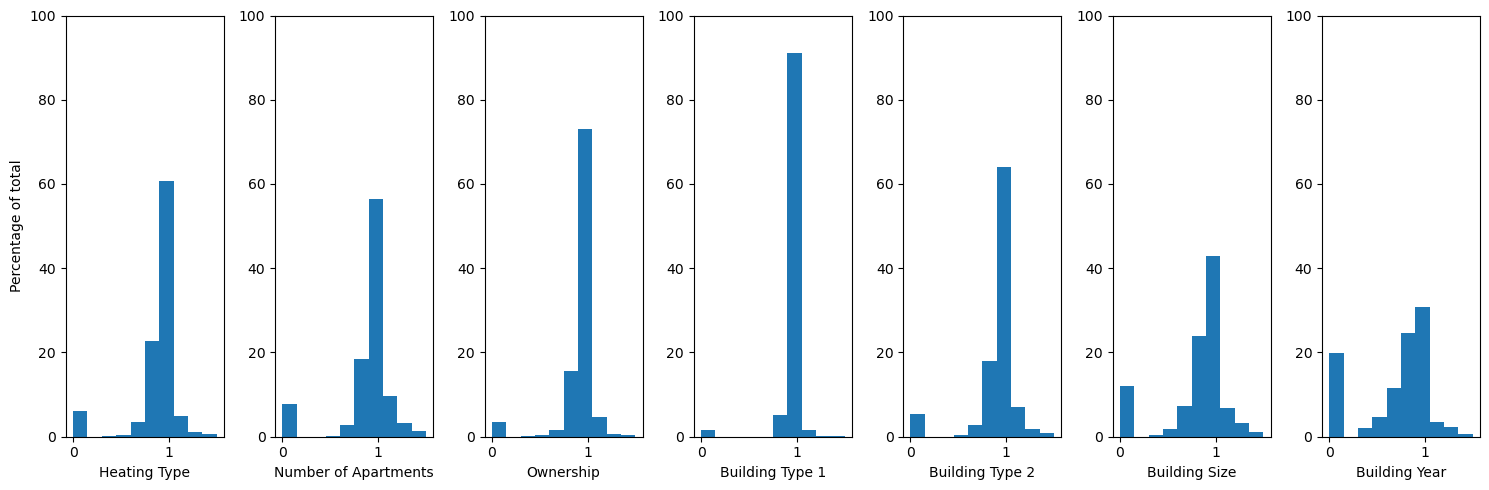

In [54]:
data1 = pivot_df['HEAT_TYPE_DC']
data2 = pivot_df['APARTMENT_NO_DC']
data3 = pivot_df['OWNERSHIP_TYPE2_DC']
data4 = pivot_df['BUILDING_TYPE1_DC']
data5 = pivot_df['BUILDING_TYPE2_DC']
data6 = pivot_df['BUILDING_SIZE_DC']
data7 = pivot_df['BUILDING_YEAR_DC']



counts1, bins1 = np.histogram(data1)
counts1 = counts1/counts1.sum()*100

counts2, bins2 = np.histogram(data2)
counts2 = counts2/counts2.sum()*100

counts3, bins3 = np.histogram(data3)
counts3 = counts3/counts3.sum()*100

counts4, bins4 = np.histogram(data4)
counts4 = counts4/counts4.sum()*100

counts5, bins5 = np.histogram(data5)
counts5 = counts5/counts5.sum()*100

counts6, bins6 = np.histogram(data6)
counts6 = counts6/counts6.sum()*100

counts7, bins7 = np.histogram(data7)
counts7 = counts7/counts7.sum()*100


plt.figure(figsize=(15,5))
plt.subplot(1,7,1)
plt.hist(bins1[:-1], bins1, weights=counts1)
plt.xlabel('Heating Type')
plt.ylabel('Percentage of total')
plt.ylim(0,100)
plt.subplot(1,7,2)
plt.hist(bins2[:-1], bins2, weights=counts2)
plt.xlabel('Number of Apartments')
plt.ylim(0,100)
plt.subplot(1,7,3)
plt.hist(bins3[:-1], bins3, weights=counts3)
plt.xlabel('Ownership')
plt.ylim(0,100)
plt.subplot(1,7,4)
plt.hist(bins4[:-1], bins4, weights=counts4)
plt.xlabel('Building Type 1')
plt.ylim(0,100)
plt.subplot(1,7,5)
plt.hist(bins5[:-1], bins5, weights=counts5)
plt.xlabel('Building Type 2')
plt.ylim(0,100)
plt.subplot(1,7,6)
plt.hist(bins6[:-1], bins6, weights=counts6)
plt.xlabel('Building Size')
plt.ylim(0,100)
plt.subplot(1,7,7)
plt.hist(bins7[:-1], bins7, weights=counts7)
plt.xlabel('Building Year')
plt.ylim(0,100)


plt.tight_layout()


plt.show()



In [53]:
pivot_df.to_csv('Buidlings100m_pivot.csv', sep=',', encoding="cp1252")